In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from skimage.feature import hog
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array
from keras.utils import load_img
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

In [2]:
DATADIR = 'D:\CV\CPmain\Train'
CATEGORIES = ['backhand','forehand']
ximg= 265
yimg= 265

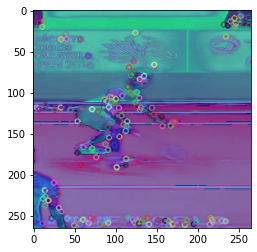

In [3]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array,(ximg,yimg))

        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2LAB)
#         img_array = ~img_array
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV)


#         fd, new_array = hog(new_array, orientations=9, pixels_per_cell=(2, 2),
#                               cells_per_block=(5, 5), visualize=True, multichannel=True)
        sift = cv2.SIFT_create()
        keypoints_1, descriptors_1 = sift.detectAndCompute(img_array,None)
        img_array = cv2.drawKeypoints(img_array,keypoints_1,img_array)
        
        plt.imshow(img_array)
        plt.show()
        break
    break

In [4]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                img_array=cv2.resize(img_array,(ximg,yimg))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2LAB)
#                 img_array = ~img_array
                new_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2HSV)
#                 img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
#                 fd, new_array = hog(img_array, orientations=9, pixels_per_cell=(2, 2),
#                               cells_per_block=(5, 5), visualize=True, multichannel=True)
                sift = cv2.SIFT_create()
                keypoints_1, descriptors_1 = sift.detectAndCompute(new_array,None)
                new_array = cv2.drawKeypoints(new_array,keypoints_1,new_array)
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()      

In [5]:
print(len(training_data))

800


In [6]:
lenofimage = len(training_data)

In [7]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)

In [8]:
X.shape

(800, 210675)

In [9]:
X = X/255.0

In [10]:
X[1]

array([0.17647059, 0.7372549 , 0.56470588, ..., 0.52941176, 0.24705882,
       0.58823529])

In [11]:
y=np.array(y)

In [12]:
y.shape

(800,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123,train_size = .78)

In [14]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [15]:
# lda = LinearDiscriminantAnalysis(n_components=1)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

# SVM

In [16]:
from sklearn.svm import SVC

svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [17]:
y2 = svc.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y2))

0.7159090909090909


Text(0.5, 1.0, 'Accuracy Score: 0.7159090909090909')

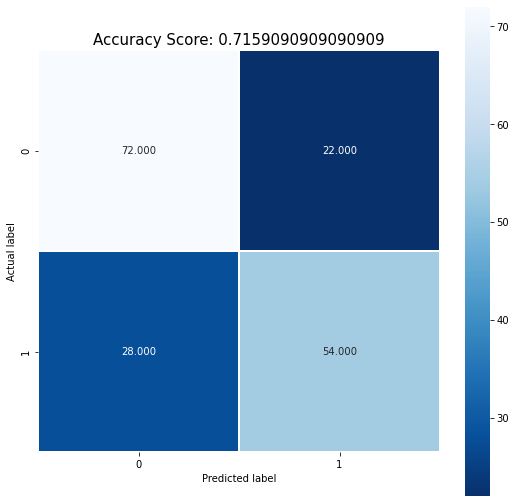

In [19]:
cm = confusion_matrix(y_test,y2)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,y2))
plt.title(all_sample_title,size=15)

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y2))

              precision    recall  f1-score   support

           0       0.72      0.77      0.74        94
           1       0.71      0.66      0.68        82

    accuracy                           0.72       176
   macro avg       0.72      0.71      0.71       176
weighted avg       0.72      0.72      0.71       176



In [21]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [22]:
result

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
171,1,1
172,0,0
173,1,1
174,1,1


# KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# since its a multi-class prediction, in order to prevent error we need some library
from sklearn.multiclass import OneVsRestClassifier

In [24]:
knn = OneVsRestClassifier(KNeighborsClassifier())

In [25]:
knn.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [26]:
# predict for one observation
knn.predict(X_test[0].reshape(1,-1))

array([0])

In [27]:
# predict for multiple observation (images) at once
knn.predict(X_test[0:10])

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [28]:
# make prediction on entire test data
predictions = knn.predict(X_test)


In [29]:
print('KNN Accuracy: %.3f' % accuracy_score(y_test,predictions))

KNN Accuracy: 0.835


Text(0.5, 1.0, 'Accuracy Score: 0.8352272727272727')

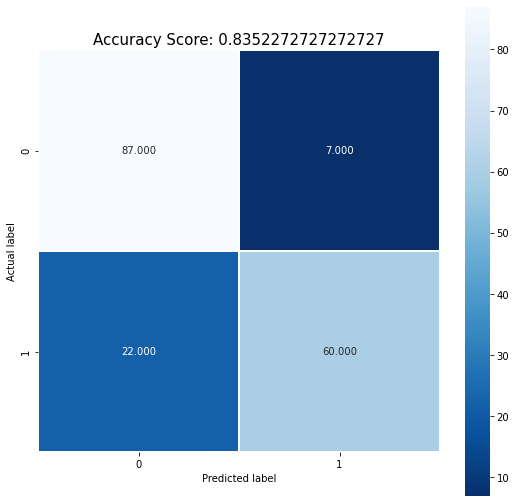

In [30]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        94
           1       0.90      0.73      0.81        82

    accuracy                           0.84       176
   macro avg       0.85      0.83      0.83       176
weighted avg       0.84      0.84      0.83       176



In [32]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})

In [33]:
result

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
171,1,1
172,0,0
173,1,0
174,1,1


# Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf = RandomForestClassifier(n_estimators = 500, 
                             max_depth = 2, 
                             max_features = 3, 
                             bootstrap = True, 
                             random_state = 18).fit(X_train, y_train)

In [36]:
# Create our predictions
prediction = clf.predict(X_test)
# Display accuracy score
accuracy_score(y_test, prediction)

0.7102272727272727

Text(0.5, 1.0, 'Accuracy Score: 0.7102272727272727')

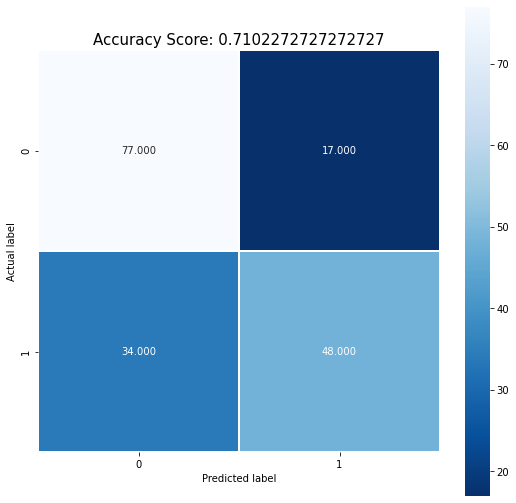

In [37]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,prediction)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,prediction))
plt.title(all_sample_title,size=15)

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        94
           1       0.74      0.59      0.65        82

    accuracy                           0.71       176
   macro avg       0.72      0.70      0.70       176
weighted avg       0.71      0.71      0.71       176



In [39]:
result = pd.DataFrame({'original' : y_test,'predicted' : prediction})

In [40]:
result

,original,predicted
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
...,...,...
171,1,1
172,0,0
173,1,1
174,1,0


# K-Means


In [41]:
from sklearn.cluster import KMeans

In [42]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# lda = LDA(n_components = 1)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)

In [43]:
kmeans = KMeans(n_clusters=2, random_state=123)
clusters = kmeans.fit(X_train,y_train)

In [44]:
# predict for one observation
kmeans.predict(X_test[0].reshape(1,-1))

array([1])

In [45]:
# predict for multiple observation (images) at once
kmeans.predict(X_test[0:10])

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [46]:
# make prediction on entire test data
predictions = kmeans.predict(X_test)

In [47]:
print('KMeans Accuracy: %.3f' % accuracy_score(y_test,predictions))

KMeans Accuracy: 0.642


Text(0.5, 1.0, 'Accuracy Score: 0.6420454545454546')

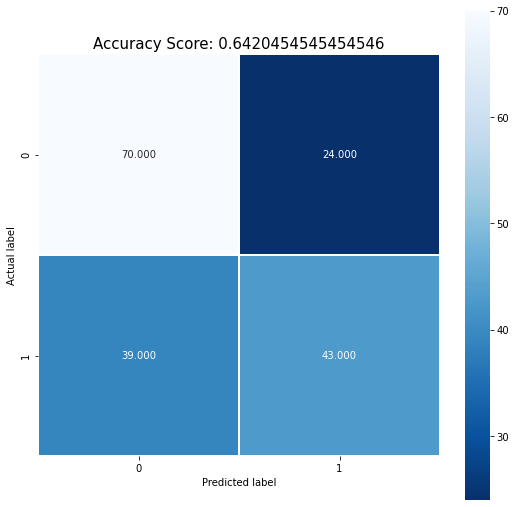

In [48]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.69      0.82      0.75        94
           1       0.74      0.59      0.65        82

    accuracy                           0.71       176
   macro avg       0.72      0.70      0.70       176
weighted avg       0.71      0.71      0.71       176



In [50]:
sse = []
list_k = [1,2,3,4,5,6,7,8,9,10,11,12,13]
for k in list_k:
    kmeans = KMeans(n_clusters=k)
    clusters = kmeans.fit_predict(X_train)
    sse.append(kmeans.inertia_)
    predictions = kmeans.predict(X_test)
    print('KMeans Accuracy for k= : %.3f' % accuracy_score(y_test,predictions))
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans Accuracy for k= : 0.534
KMeans Accuracy for k= : 0.642
KMeans Accuracy for k= : 0.295
KMeans Accuracy for k= : 0.324
KMeans Accuracy for k= : 0.210
KMeans Accuracy for k= : 0.199
KMeans Accuracy for k= : 0.210


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Error in sys.excepthook:
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2063, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1367, in structured_traceback
    return FormattedTB.structured_traceback(
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1267, in structured_traceback
    return VerboseTB.structured_traceback(
  File "C:\Users\D

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'KeyboardInterrupt' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 248, in wrapped
    return f(*args, **kwargs)
  File "C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\ultratb.py", line 281, in _fixed_getinnerframes
    records = fix_frame_records_filenames(inspect.getinnerframes(etb, context))
  File "C:\Users\DELL\anaconda3\lib\inspect.py", line 1515, in getinnerframes
    frameinfo = (tb.tb_frame,) + getframeinfo(tb, cont

KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 2, in where
KeyboardInterrupt: 


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg = []
for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    clusters = kmeans.fit(X_train,y_train)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg.append(silhouette_score(X, cluster_labels))
    plt.plot(range_n_clusters,silhouette_avg,'bx-')
    
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal K')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,predictions))

In [ ]:
result = pd.DataFrame({'original' : y_test,'predicted' : predictions})

In [ ]:
result

# XG BOOST


In [51]:
from xgboost import XGBClassifier

In [52]:
clf=XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=500, objective='binary:logistic', booster='gbtree')

In [53]:
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

In [54]:
#Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        94
           1       0.73      0.72      0.72        82

    accuracy                           0.74       176
   macro avg       0.74      0.74      0.74       176
weighted avg       0.74      0.74      0.74       176

[[72 22]
 [23 59]]


In [ ]:
print('KMeans Accuracy: %.3f' % accuracy_score(y_test,predictions))

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

# Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
n_nodes = clf.tree_.node_count
print(n_nodes)

In [ ]:
print(clf.tree_.max_depth)

In [ ]:
# make prediction on entire test data
predictions = clf.predict(X_test)

In [ ]:
print('KMeans Accuracy: %.3f' % accuracy_score(y_test,predictions))

In [ ]:
cm = confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,predictions))
plt.title(all_sample_title,size=15)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))